In [ ]:
# create lat and lng combinations
# import dependencies Module 6
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# create a set of random lat and lng combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # zip packs each lat/lng with same index into a tuple.
lat_lngs
# this output is a zip object in memory

In [ ]:
# API_practice
# create a practice set of random lat/lng combos.
#lats = [25.129, 25.920, 26.625, 59.989, 37.305]
#lngs = [-67.597, 11.095, 74.842, -76.891, -61.133]
#lat_lngs = zip(lats, lngs)


In [ ]:
# add the lat/lngs to a list
coordinates = list(lat_lngs)


In [ ]:
# unzip the lat/lngs into the coordinaces list before this step!
# use print func to display the lat/long combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1]) # outputs ordered pairs of lat/lng coordinates.

#### Now we have ordered pairs of lat/lng in a list.  We can iterate thru the list of tuples to find the nearest city to those coordinates.

In [ ]:
# 6.1.5 Generate random world cities
from citipy import citipy

#### create a for loop that will iterate thru the coordiantes unzipped tuple.
#### uses the 5 pairs of lat/lng we used from zip practice to get a city and country code from the citipy module.


In [ ]:
# use print function to display the lat/lng combos
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, # chain city_name to nearest_city() func.
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code) # to print country, chain country_code # to nearest city() func.

In [ ]:
# create a list for holding the cities.
cities = [] # create cities list to store the city names
# Identify the nearest city for each lat/lng combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # if the city is unique, then we will add it to the cities list.
    if city not in cities: # a decision stmnt with logical op 'not in' to determine whether found city is already in cities list.
        cities.append(city) # If not in list, append func to add it.
# print the city count to confirm sufficient count.
len(cities)


In [ ]:
len(cities)

#### 6.2.6 Get the City Weather Data

In [ ]:
import requests
from config import weather_api_key

In [ ]:
# starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
# print(url)

In [ ]:
# import the time library and the datetime module from the datetime library.
import time 
from datetime import datetime

In [ ]:
# above, use enumerate() vs two for loops to iterate thru the list of cities and retrieve both the index, and city from list.
# using enumerate method to get the index of the city for logging purposes and the city for creating an endpoint url.
#for i, item in enumerate(list):

#### When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse. If not, the script might stop at that moment and not finish getting all the data we need.

### 6.2.6 (cont.) Try-except Blocks

#### how to handle errors while parsing weather data from a JSON file.

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
len(city_data)

In [ ]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
# ?? Wont run. See 6.2.7
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = df[new_column_order]


#### Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:  Then, we assign a new or the same DataFrame with new column order:

In [ ]:
# create the output file (CSV).
output_data_file = "/Users/damonphillips/Desktop/bootcamp/week_6_APIs/World_Weather_Analysis/cities.csv"
# export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [ ]:
# extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# import the time module.
import time
# get todays date in seconds.
today = time.time()
today

In [ ]:
today = time.strftime("%x")
today

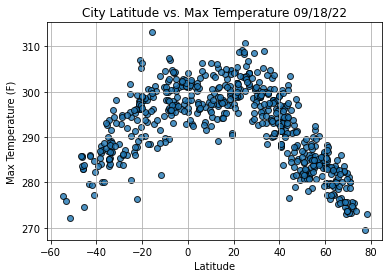

In [67]:
# scatter plot for the latitude vs maximum temperature.
# import module
import time

# buld the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="(Cities")

# incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)




# show plot
plt.show()

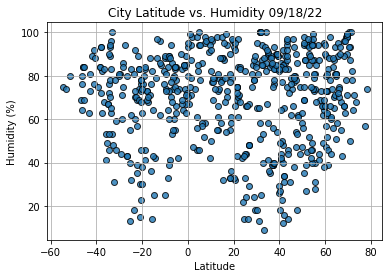

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_6_APIs/World_Weather_Analysis/Fig2.png")

# Show plot.
plt.show()

### 6.3.3 Plot Latitude vs Cloudiness

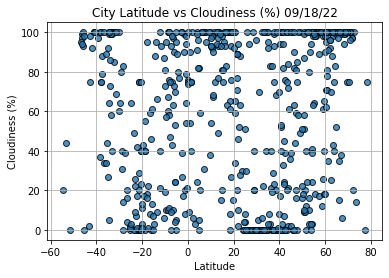

In [75]:
# build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphy properties.
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# save the figure.
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_6_APIs/World_Weather_Analysis/Fig3.png")

#show plot
plt.show()

### 6.3.4 Plot Latitude vs. Wind Speed (last scatter, #4)

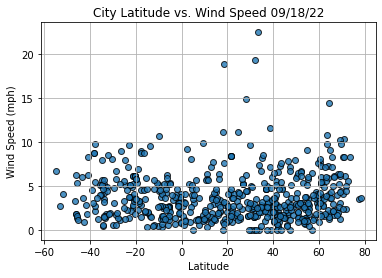

In [77]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorp the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_6_APIs/World_Weather_Analysis/Fig4.png")

# show plot
plt.show()